In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
pd.read_csv ('customers.csv')

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [30]:
pd.read_csv ('products.csv')

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [32]:
pd.read_csv ('transactions.csv')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


'C:\\Users\\Raunaq'

In [35]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [37]:
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [ ]:
#TASK 1- EDA and BUSINESS INSIGHTS

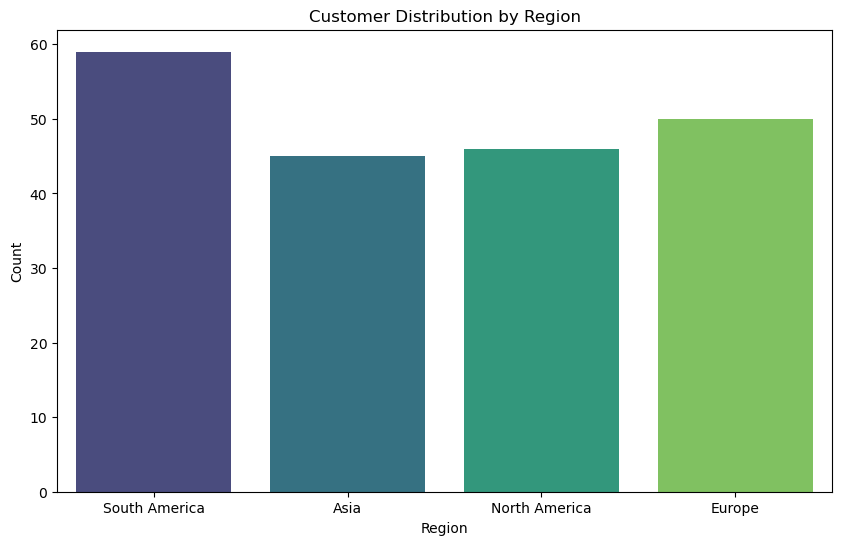

In [38]:
# 1. Customer Region Distribution- Identifying the continent based on customer concentration 
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

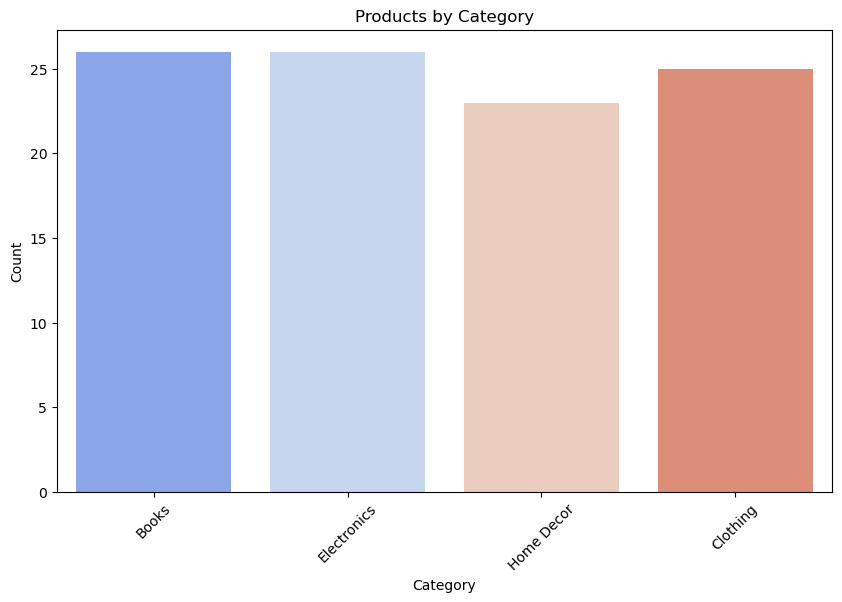

In [39]:
# 2. Product Category Analysis- A graph of the products purchased. 
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x="Category", palette="coolwarm")
plt.title("Products by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

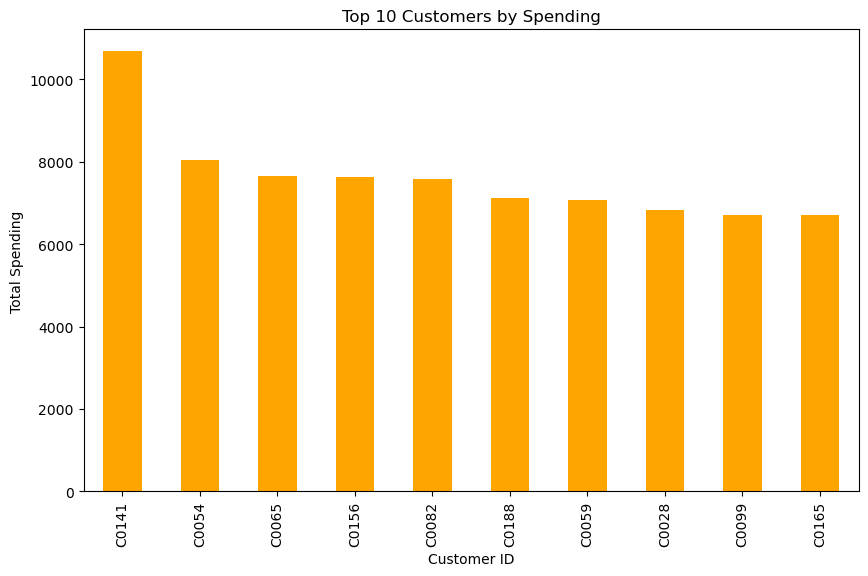

In [43]:
# 3. Top Customers by Spending- a graph of high value customers, or customers who spend the most
top_customers = data.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
top_customers.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()


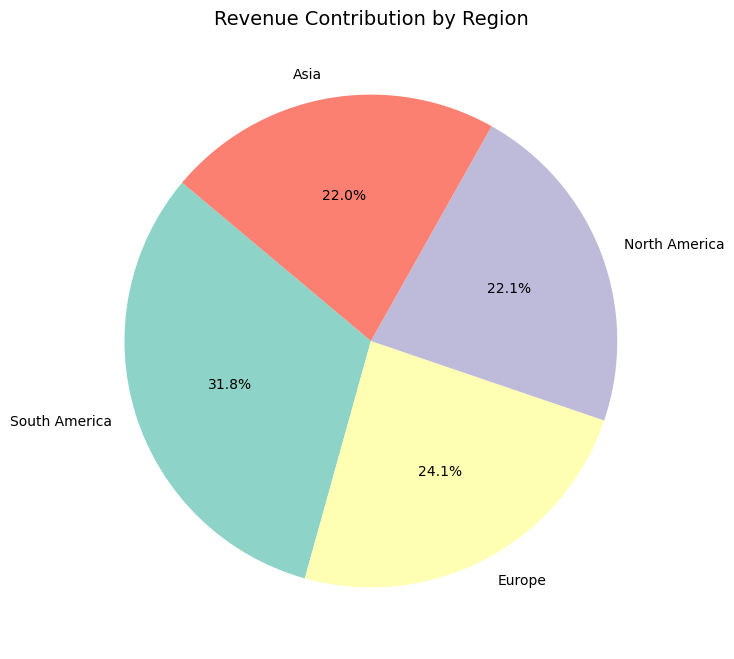

In [49]:
# 5. Calculate total revenue by region
region_revenue = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

# Plot revenue contribution by region
region_revenue.plot(kind="pie", figsize=(8, 8), autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3"))
plt.title("Revenue Contribution by Region", fontsize=14)
plt.ylabel("")
plt.show()

# The region contributing the most revenue should be prioritized for marketing campaigns, while low-performing regions could benefit from targeted promotions.

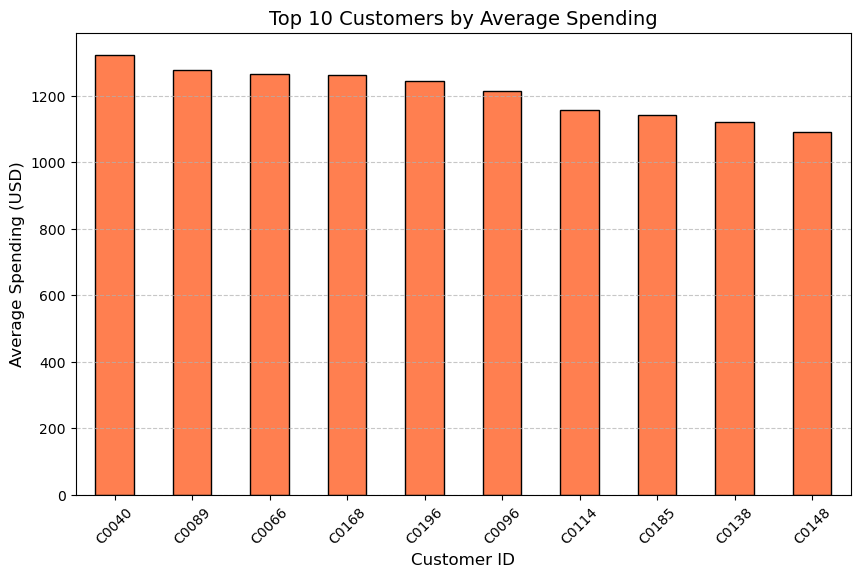

In [48]:
# 6. Calculate average spending per customer
avg_spending = data.groupby("CustomerID")["TotalValue"].mean().sort_values(ascending=False)

# Plot the top 10 customers by average spending
avg_spending.head(10).plot(kind="bar", figsize=(10, 6), color="coral", edgecolor="black")
plt.title("Top 10 Customers by Average Spending", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Average Spending (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
 
# Customers with high average spending can be targeted with premium products or loyalty rewards to increase retention and sales.